In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [320]:
#Economia antes de la enfermedad
w=1#salario diario
beta=0.999#Discount factor
days=100#periodos a simular
I=0.01#tasa de interes (bancario)
theta=1.1

Uarr = np.zeros(days)#Arreglo de utilidades
carr = np.zeros(days)#Arreglo de consumos
narr = np.zeros(days)#Arreglo de horas de trabajo
Garr = np.zeros(days)#Arreglo de horas de Presupuesto Gob
warr = w*np.ones(days)#Arreglo salarios
Monarr = np.zeros(days)#Arreglo Ahorros

def Util(C,N):
    ut=0
    for m in range(len(C)):
        ut+=(beta**m)*(np.log(C[m])-theta*N[m]**2/2)
    return ut
        
def Fix(C,N):
    D=0
    for n in range(len(C)-1):
        D=w*N[n]+(1+I)*D-C[n]
    Cfin=w*N[-1]+(1+I)*D
    return Cfin

def riq(C,N):
    Monarr = np.zeros(days)#Arreglo Ahorros
    D=0
    Cpar=0
    for n in range(len(C)):
        D=w*N[n]+(1+I)*D-C[n]
        Monarr[n]=D
    return(Monarr)

def optN(C):
    N=np.zeros_like(C)
    for m in range(len(N)):
        N[m]=w/(theta*C[m])
    return N

def getC(c0):
    C=np.zeros(days)
    C[0]=c0
    for m in range(1,days):
        C[m]=beta*(1+I)*C[m-1]
    return C

In [321]:
N = np.ones(days)#Arreglo horas trabajadas
C = np.ones(days)#Arreglo consumo

c0=1
for m in range(10000):
    tempc0=c0+np.random.normal(0,0.1)
    tempC=getC(tempc0)
    tempN=optN(tempC)
    tempC[-1]=Fix(tempC,tempN)    
    if Util(tempC,tempN)>Util(C,N):
        #print(Util(tempC,tempN))
        C=tempC
        N=tempN
        c0=tempc0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log


In [315]:
c0

0.6579920343772167

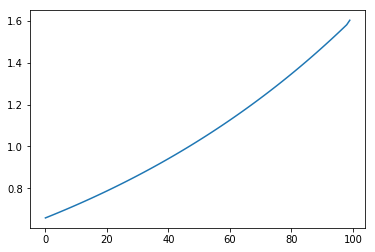

In [323]:
plt.plot(C)

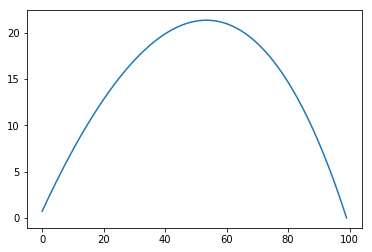

In [317]:
plt.plot(riq(C,N))

In [324]:
Util(C,N)

-45.986213882546444

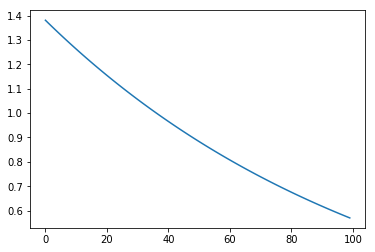

In [318]:
plt.plot(N)